In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt

## Raw DataFrames

In [2]:
# global land temperature data by city, with latitude/longitude values
filename = 'Global-Land-Temperatures-By-City.csv'
temp_df = pd.read_csv(filename)

In [3]:
# US federal emergency data, join on county
filename1 = 'federal_emergencies.csv'
disaster_df = pd.read_csv(filename1)

In [4]:
# data of latitude/longitude and county to merge two dataframes
filename2 = 'zip_codes_states.csv'
us_join = pd.read_csv(filename2)

## Cleaning steps

In [5]:
temp_us = temp_df[temp_df['Country'] == 'United States']

In [6]:
# temp_df: drop all countries except US and drop NaN values
temp_us = temp_df[temp_df['Country'] == 'United States'].dropna()

In [7]:
# temp_df: create new lat/long columns dropping NESW direction
temp_us['lat_n'] = [float(lat[:-1]) if lat[-1]=='N' else -1*float(lat[:-1]) for lat in temp_us.loc[:,'Latitude']]
temp_us['lon_n'] = [float(lon[:-1]) if lon[-1]=='E' else -1*float(lon[:-1]) for lon in temp_us.loc[:,'Longitude']]

In [8]:
# unique coordinates in the temp_us dataframe
temp_us_coords = temp_us[['lat_n','lon_n']].drop_duplicates()

In [9]:
# function adds a column with pythagorean theorem 
def coord2loc(coords):
    us2 = us_join.copy()
    us2['dist'] = ((us2.latitude-coords.lat_n)**2+(us2.longitude-coords.lon_n)**2)**(1/2)
    state = us2.loc[us2.dist==min(us2.dist)]['state'].values[0]
    county = us2.loc[us2.dist==min(us2.dist)]['county'].values[0]
    return([coords.lat_n,coords.lon_n,state,county])

In [10]:
# create dataframe to join on between
join = pd.DataFrame([coord2loc(coords[1]) for coords in temp_us_coords.iterrows()])
join.columns = ['lat_n','lon_n','state','county']

In [11]:
# merge temp_df and us_join
temp_county = pd.merge(temp_us, join, how='left', on = ['lat_n', 'lon_n'])
temp_county.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,lat_n,lon_n,state,county
0,1820-01-01,2.101,3.217,Abilene,United States,32.95N,100.53W,32.95,-100.53,TX,Fisher
1,1820-02-01,6.926,2.853,Abilene,United States,32.95N,100.53W,32.95,-100.53,TX,Fisher
2,1820-03-01,10.767,2.395,Abilene,United States,32.95N,100.53W,32.95,-100.53,TX,Fisher
3,1820-04-01,17.989,2.202,Abilene,United States,32.95N,100.53W,32.95,-100.53,TX,Fisher
4,1820-05-01,21.809,2.036,Abilene,United States,32.95N,100.53W,32.95,-100.53,TX,Fisher


In [12]:
temp_county['year'] = [date[:4]
 for date in temp_county.loc[:,'dt']]

In [13]:
temp_county['countyname'] = temp_county.county +' County'

In [14]:
disaster_county = disaster_df.copy()

In [15]:
disaster_county['Year'] = [date[-4:]
 for date in disaster_county.loc[:,'Declaration Date']]

In [16]:
avg_year_temp = temp_county.groupby(['countyname','year']).mean().reset_index()

In [17]:
joinall = pd.merge(disaster_county, avg_year_temp, how='left', left_on=['County','Year'], right_on=['countyname','year'])
joinall

,Declaration Number,Declaration Type,Declaration Date,State,County,Disaster Type,Disaster Title,Start Date,End Date,Close Date,...,Individuals & Households Program,Public Assistance Program,Hazard Mitigation Program,Year,countyname,year,AverageTemperature,AverageTemperatureUncertainty,lat_n,lon_n
0,DR-1,Disaster,05/02/1953,GA,NaN,Tornado,Tornado,05/02/1953,05/02/1953,06/01/1954,...,No,Yes,Yes,1953,NaN,NaN,NaN,NaN,NaN,NaN
1,DR-2,Disaster,05/15/1953,TX,NaN,Tornado,Tornado and Heavy Rainfall,05/15/1953,05/15/1953,01/01/1958,...,No,Yes,Yes,1953,NaN,NaN,NaN,NaN,NaN,NaN
2,DR-3,Disaster,05/29/1953,LA,NaN,Flood,Flood,05/29/1953,05/29/1953,02/01/1960,...,No,Yes,Yes,1953,NaN,NaN,NaN,NaN,NaN,NaN
3,DR-4,Disaster,06/02/1953,MI,NaN,Tornado,Tornado,06/02/1953,06/02/1953,02/01/1956,...,No,Yes,Yes,1953,NaN,NaN,NaN,NaN,NaN,NaN
4,DR-5,Disaster,06/06/1953,MT,NaN,Flood,Floods,06/06/1953,06/06/1953,12/01/1955,...,No,Yes,Yes,1953,NaN,NaN,NaN,NaN,NaN,NaN
5,DR-6,Disaster,06/09/1953,MI,NaN,Tornado,Tornado,06/09/1953,06/09/1953,03/30/1956,...,No,Yes,Yes,1953,NaN,NaN,NaN,NaN,NaN,NaN
6,DR-7,Disaster,06/11/1953,MA,NaN,Tornado,Tornado,06/11/1953,06/11/1953,06/01/1956,...,No,Yes,Yes,1953,NaN,NaN,NaN,NaN,NaN,NaN
7,DR-8,Disaster,06/11/1953,IA,NaN,Flood,Flood,06/11/1953,06/11/1953,11/01/1955,...,No,Yes,Yes,1953,NaN,NaN,NaN,NaN,NaN,NaN
8,DR-9,Disaster,06/19/1953,TX,NaN,Flood,Flood,06/19/1953,06/19/1953,01/01/1958,...,No,Yes,Yes,1953,NaN,NaN,NaN,NaN,NaN,NaN
9,DR-11,Disaster,07/02/1953,NH,NaN,Fire,Forest Fire,07/02/1953,07/02/1953,02/01/1956,...,No,Yes,Yes,1953,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
print(joinall.info(), joinall.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46185 entries, 0 to 46184
Data columns (total 21 columns):
Declaration Number                  46185 non-null object
Declaration Type                    46185 non-null object
Declaration Date                    46185 non-null object
State                               46185 non-null object
County                              45988 non-null object
Disaster Type                       46185 non-null object
Disaster Title                      46185 non-null object
Start Date                          46185 non-null object
End Date                            45843 non-null object
Close Date                          35210 non-null object
Individual Assistance Program       46185 non-null object
Individuals & Households Program    46185 non-null object
Public Assistance Program           46185 non-null object
Hazard Mitigation Program           46185 non-null object
Year                                46185 non-null object
countyname           

## Exploring the Data

The first angle to examine is how temperature in the United States is changing over time. We can plot the average yearly temperature over time, for each of the states we have data for. In the case where there were multiple counties in each state, the average temperature for all of the counties were taken for one value per year per state.

Text(0,0.5,'Temperature (in degrees Celsius)')

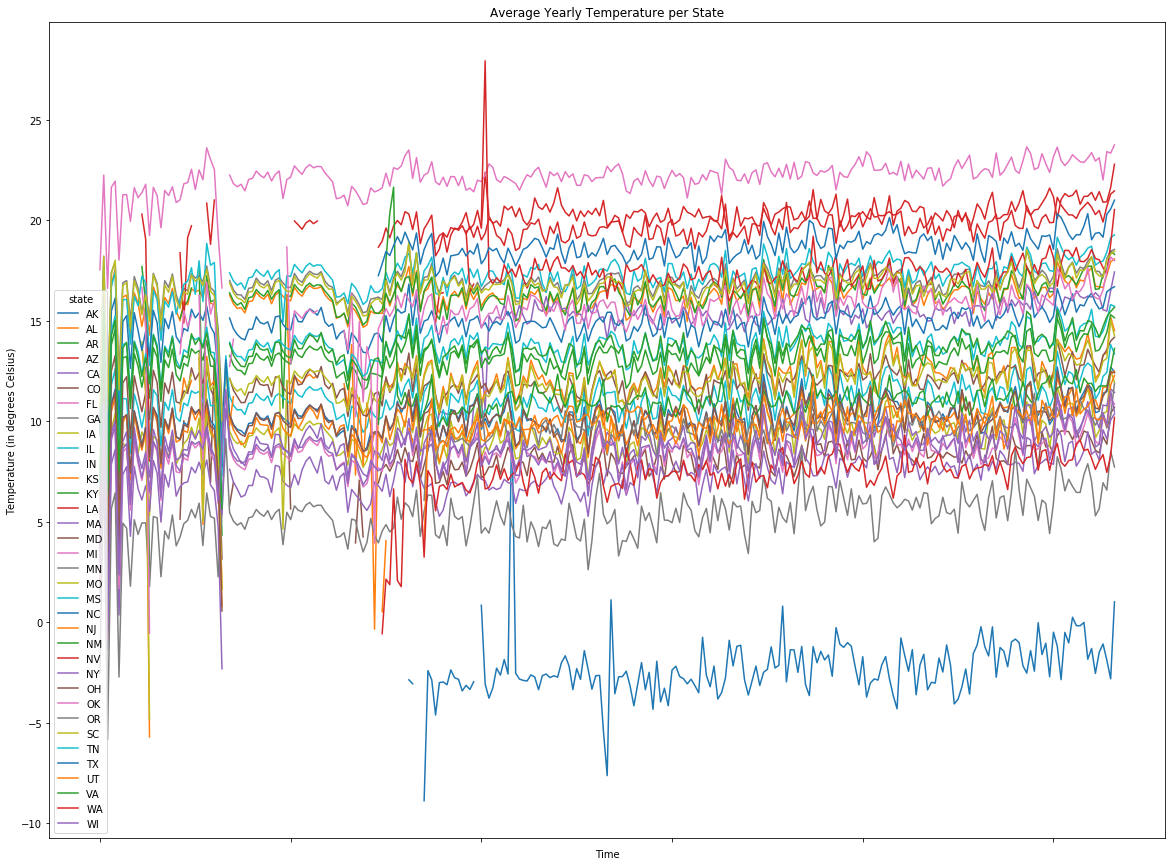

In [19]:
# plot data
fig, ax = plt.subplots(figsize=(20,15))
temp_county.groupby(['year','state']).mean()['AverageTemperature'].unstack().plot(ax=ax)
plt.title('Average Yearly Temperature per State')
plt.xlabel('Time')
plt.ylabel('Temperature (in degrees Celsius)')

At a glance, there are definite trends in the data; however a deeper look at the values will gives us more insight as to what is happening with the temperature values.

In [20]:
state_year_temperature = temp_county.groupby(['state','year']).mean()['AverageTemperature'].unstack()
state_year_temperature['min'] = state_year_temperature.min(axis=1)
state_year_temperature['max'] = state_year_temperature.max(axis=1)
state_year_temperature['difference'] = state_year_temperature['max'] - state_year_temperature['min']
state_year_temperature.head()

year,1743,1744,1745,1750,1751,1752,1753,1754,1755,1756,...,2007,2008,2009,2010,2011,2012,2013,min,max,difference
state,,,,,,,,,,,,,,,,,,,,,
AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.300250,-2.540750,-1.489250,-1.074667,-1.881833,-2.810667,1.018750,-8.876250,10.531000,19.407250
AL,9.6558,17.6559,9.8357,16.821818,17.5721,10.9531,16.194783,16.276356,14.06898,16.391511,...,17.653717,16.730567,16.686150,16.673333,17.296717,17.939717,18.083444,9.217533,18.083444,8.865911
AR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.731750,16.565000,16.599250,17.324417,17.539000,18.488917,18.308111,2.407000,18.488917,16.081917
AZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.397233,20.999683,21.431000,20.904750,20.927150,21.638017,22.794044,18.836150,22.794044,3.957894
CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.185137,16.402520,16.216013,15.557556,15.484946,16.501552,17.434443,8.631000,17.434443,8.803443


Text(0,0.5,'Temperature (in degrees Celsius)')

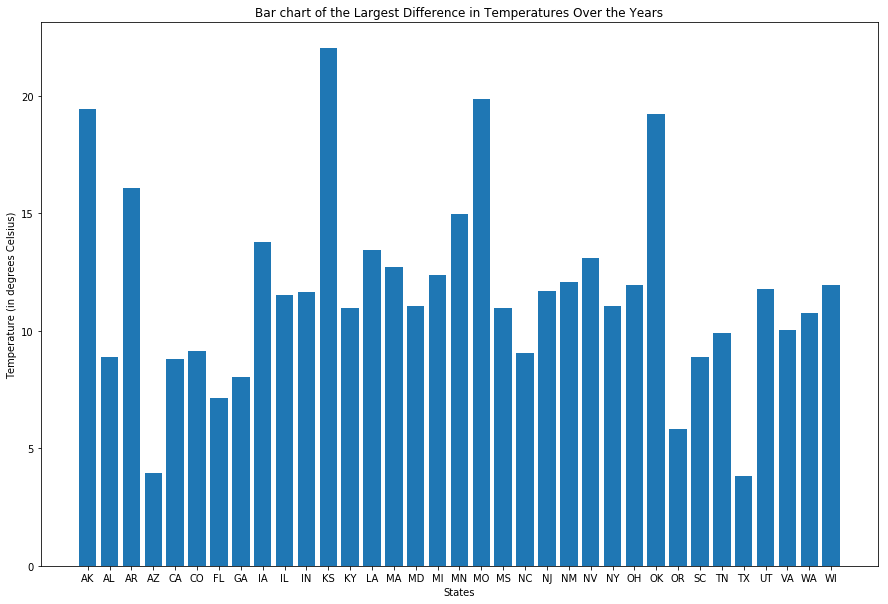

In [21]:
# Bar chart of the largest difference in temperatures over the years
fig, ax = plt.subplots(0, 0, figsize=(15,10))
state_year_temperature_graph = state_year_temperature.reset_index()
state_year_temperature_graph = state_year_temperature_graph[['state','min','max','difference']]
plt.bar(state_year_temperature_graph['state'], state_year_temperature_graph['difference'])
plt.title('Bar chart of the Largest Difference in Temperatures Over the Years')
plt.xlabel('States')
plt.ylabel('Temperature (in degrees Celsius)')

Text(0,0.5,'Temperature (in degrees Celsius)')

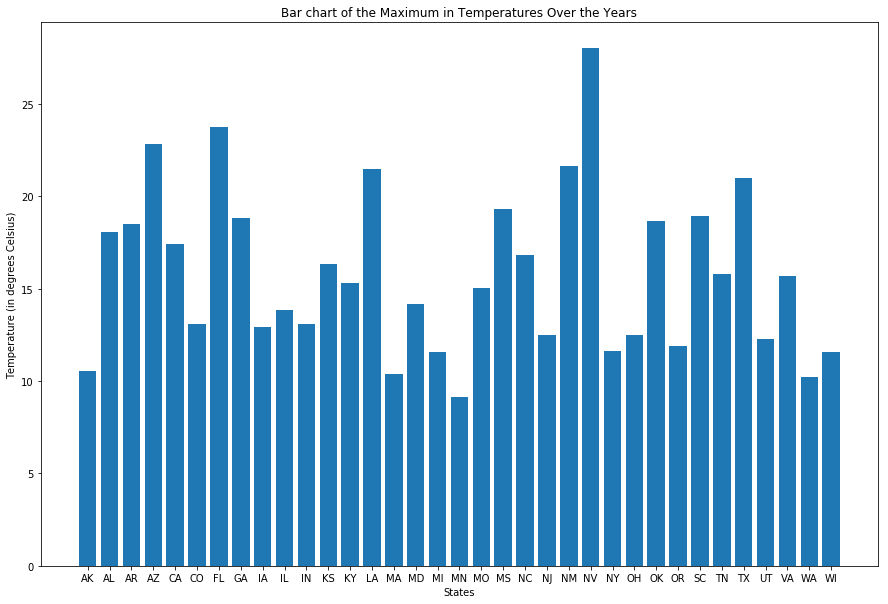

In [28]:
# Bar chart of the largest difference in temperatures over the years
fig, ax = plt.subplots(0, 0, figsize=(15,10))
state_year_temperature_graph = state_year_temperature.reset_index()
state_year_temperature_graph = state_year_temperature_graph[['state','min','max','difference']]
plt.bar(state_year_temperature_graph['state'], state_year_temperature_graph['max'])
plt.title('Bar chart of the Maximum in Temperatures Over the Years')
plt.xlabel('States')
plt.ylabel('Temperature (in degrees Celsius)')

Text(0.5,1,'west north central region')

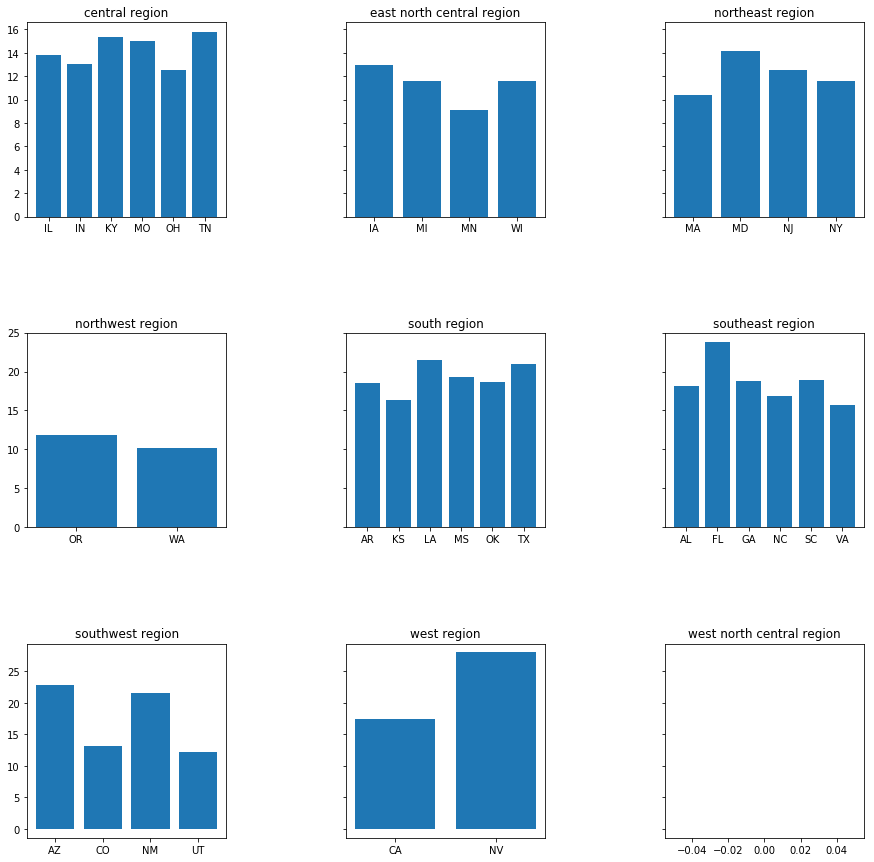

In [23]:
# bar charts for each state, grouped by region, plotting the maximum difference in average temperature.
fig, ax = plt.subplots(3, 3, sharey='row',figsize=(15,15))
fig.subplots_adjust(hspace=.6, wspace=.6)
central_region = state_year_temperature_graph[state_year_temperature_graph['state'].isin(['IL','IN','KY','MO','OH','TN','WV'])]
ax[0, 0].bar(central_region['state'], central_region['max'])
ax[0, 0].set_title('central region')
east_north_central_region = state_year_temperature_graph[state_year_temperature_graph['state'].isin(['IA','MI','MN','WI'])]
ax[0, 1].bar(east_north_central_region['state'], east_north_central_region['max'])
ax[0, 1].set_title('east north central region')
northeast_region = state_year_temperature_graph[state_year_temperature_graph['state'].isin(['CT','DE','ME','MD','MA','NH','NJ','NY','PA','RI','VT'])]
ax[0, 2].bar(northeast_region['state'], northeast_region['max'])
ax[0, 2].set_title('northeast region')
northwest_region = state_year_temperature_graph[state_year_temperature_graph['state'].isin(['ID','OR','WA'])]
ax[1, 0].bar(northwest_region['state'], northwest_region['max'])
ax[1, 0].set_title('northwest region')
south_region = state_year_temperature_graph[state_year_temperature_graph['state'].isin(['AR','KS','LA','MS','OK','TX'])]
ax[1, 1].bar(south_region['state'], south_region['max'])
ax[1, 1].set_title('south region')
southeast_region = state_year_temperature_graph[state_year_temperature_graph['state'].isin(['AL','FL','GA','NC','SC','VA'])]
ax[1, 2].bar(southeast_region['state'], southeast_region['max'])
ax[1, 2].set_title('southeast region')
southwest_region = state_year_temperature_graph[state_year_temperature_graph['state'].isin(['AZ','CO','NM','UT'])]
ax[2, 0].bar(southwest_region['state'], southwest_region['max'])
ax[2, 0].set_title('southwest region')
west_region = state_year_temperature_graph[state_year_temperature_graph['state'].isin(['CA','NV'])]
ax[2, 1].bar(west_region['state'], west_region['max'])
ax[2, 1].set_title('west region')
west_north_central_region = state_year_temperature_graph[state_year_temperature_graph['state'].isin(['MT','NE','ND','SD','WY'])]
ax[2, 2].bar(west_north_central_region['state'], west_north_central_region['max'])
ax[2, 2].set_title('west north central region')

Text(0.5,1,'west north central region')

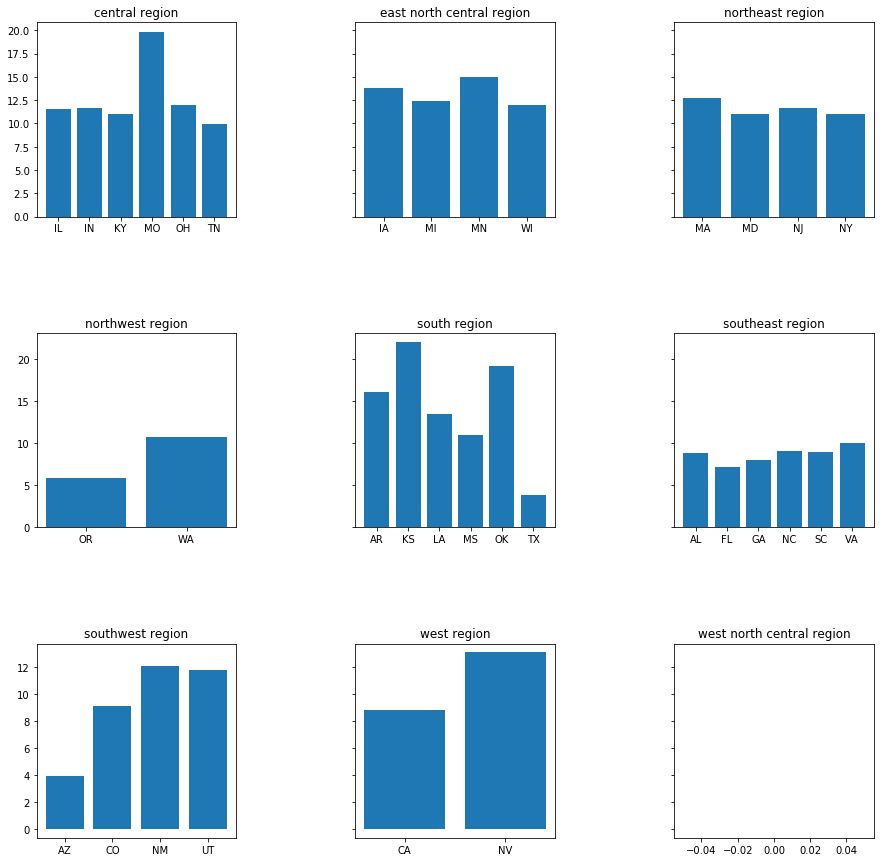

In [24]:
# bar charts for each state, grouped by region, plotting the largest difference in average temperature.
fig, ax = plt.subplots(3, 3, sharey='row',figsize=(15,15))
fig.subplots_adjust(hspace=.6, wspace=.6)
central_region = state_year_temperature_graph[state_year_temperature_graph['state'].isin(['IL','IN','KY','MO','OH','TN','WV'])]
ax[0, 0].bar(central_region['state'], central_region['difference'])
ax[0, 0].set_title('central region')
east_north_central_region = state_year_temperature_graph[state_year_temperature_graph['state'].isin(['IA','MI','MN','WI'])]
ax[0, 1].bar(east_north_central_region['state'], east_north_central_region['difference'])
ax[0, 1].set_title('east north central region')
northeast_region = state_year_temperature_graph[state_year_temperature_graph['state'].isin(['CT','DE','ME','MD','MA','NH','NJ','NY','PA','RI','VT'])]
ax[0, 2].bar(northeast_region['state'], northeast_region['difference'])
ax[0, 2].set_title('northeast region')
northwest_region = state_year_temperature_graph[state_year_temperature_graph['state'].isin(['ID','OR','WA'])]
ax[1, 0].bar(northwest_region['state'], northwest_region['difference'])
ax[1, 0].set_title('northwest region')
south_region = state_year_temperature_graph[state_year_temperature_graph['state'].isin(['AR','KS','LA','MS','OK','TX'])]
ax[1, 1].bar(south_region['state'], south_region['difference'])
ax[1, 1].set_title('south region')
southeast_region = state_year_temperature_graph[state_year_temperature_graph['state'].isin(['AL','FL','GA','NC','SC','VA'])]
ax[1, 2].bar(southeast_region['state'], southeast_region['difference'])
ax[1, 2].set_title('southeast region')
southwest_region = state_year_temperature_graph[state_year_temperature_graph['state'].isin(['AZ','CO','NM','UT'])]
ax[2, 0].bar(southwest_region['state'], southwest_region['difference'])
ax[2, 0].set_title('southwest region')
west_region = state_year_temperature_graph[state_year_temperature_graph['state'].isin(['CA','NV'])]
ax[2, 1].bar(west_region['state'], west_region['difference'])
ax[2, 1].set_title('west region')
west_north_central_region = state_year_temperature_graph[state_year_temperature_graph['state'].isin(['MT','NE','ND','SD','WY'])]
ax[2, 2].bar(west_north_central_region['state'], west_north_central_region['difference'])
ax[2, 2].set_title('west north central region')

I will also look at the seasons (Spring, Summer, Fall, Winter) to see how temperature is changing depending on the time of year.

In [31]:
# Create season column from datetime
temp_county['month'] = [date[5:7]
 for date in temp_county.loc[:,'dt']]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,lat_n,lon_n,state,county,year,countyname,month
0,1820-01-01,2.101,3.217,Abilene,United States,32.95N,100.53W,32.95,-100.53,TX,Fisher,1820,Fisher County,01
1,1820-02-01,6.926,2.853,Abilene,United States,32.95N,100.53W,32.95,-100.53,TX,Fisher,1820,Fisher County,02
2,1820-03-01,10.767,2.395,Abilene,United States,32.95N,100.53W,32.95,-100.53,TX,Fisher,1820,Fisher County,03
3,1820-04-01,17.989,2.202,Abilene,United States,32.95N,100.53W,32.95,-100.53,TX,Fisher,1820,Fisher County,04
4,1820-05-01,21.809,2.036,Abilene,United States,32.95N,100.53W,32.95,-100.53,TX,Fisher,1820,Fisher County,05
5,1820-06-01,25.682,2.008,Abilene,United States,32.95N,100.53W,32.95,-100.53,TX,Fisher,1820,Fisher County,06
6,1820-07-01,26.268,1.802,Abilene,United States,32.95N,100.53W,32.95,-100.53,TX,Fisher,1820,Fisher County,07
7,1820-08-01,25.048,1.895,Abilene,United States,32.95N,100.53W,32.95,-100.53,TX,Fisher,1820,Fisher County,08
8,1820-09-01,22.435,2.216,Abilene,United States,32.95N,100.53W,32.95,-100.53,TX,Fisher,1820,Fisher County,09
9,1820-10-01,15.830,2.169,Abilene,United States,32.95N,100.53W,32.95,-100.53,TX,Fisher,1820,Fisher County,10


In [45]:
temp_county.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 661524 entries, 0 to 661523
Data columns (total 14 columns):
dt                               661524 non-null object
AverageTemperature               661524 non-null float64
AverageTemperatureUncertainty    661524 non-null float64
City                             661524 non-null object
Country                          661524 non-null object
Latitude                         661524 non-null object
Longitude                        661524 non-null object
lat_n                            661524 non-null float64
lon_n                            661524 non-null float64
state                            661524 non-null object
county                           661524 non-null object
year                             661524 non-null object
countyname                       661524 non-null object
month                            661524 non-null object
dtypes: float64(4), object(10)
memory usage: 95.7+ MB


In [43]:
temp_county['month'] = [month[:1] if month < 10 else month == month for month in temp_county['month']]

TypeError: '<' not supported between instances of 'str' and 'int'

In [40]:
def season(temp_county):
    if (temp_county['month'] == 12) or (temp_county['month'] == 1) or (temp_county['month'] == 2):
        return 'Winter'
    elif (temp_county['month'] == 3) or (temp_county['month'] == 4) or (temp_county['month'] == 5):
        return 'Spring'
    elif (temp_county['month'] == 6) or (temp_county['month'] == 7) or (temp_county['month'] == 8):
        return 'Summer'
    elif (temp_county['month'] == 9) or (temp_county['month'] == 10) or (temp_county['month'] == 11):
        return 'Fall'
    else:
        return 'No season'
temp_county['season'] = temp_county.apply(season)

KeyError: ('month', 'occurred at index dt')

In [25]:
central_region = temp_county[temp_county['state'].isin(['IL','IN','KY','MO','OH','TN','WV'])]
east_north_central_region = temp_county[temp_county['state'].isin(['IA','MI','MN','WI'])]
northeast_region = temp_county[temp_county['state'].isin(['CT','DE','ME','MD','MA','NH','NJ','NY','PA','RI','VT'])]
northwest_region = temp_county[temp_county['state'].isin(['ID','OR','WA'])]
south_region = temp_county[temp_county['state'].isin(['AR','KS','LA','MS','OK','TX'])]
southeast_region = temp_county[temp_county['state'].isin(['AL','FL','GA','NC','SC','VA'])]
southwest_region = temp_county[temp_county['state'].isin(['AZ','CO','NM','UT'])]
west_region = temp_county[temp_county['state'].isin(['CA','NV'])]
west_north_central_region = temp_county[temp_county['state'].isin(['MT','NE','ND','SD','WY'])]

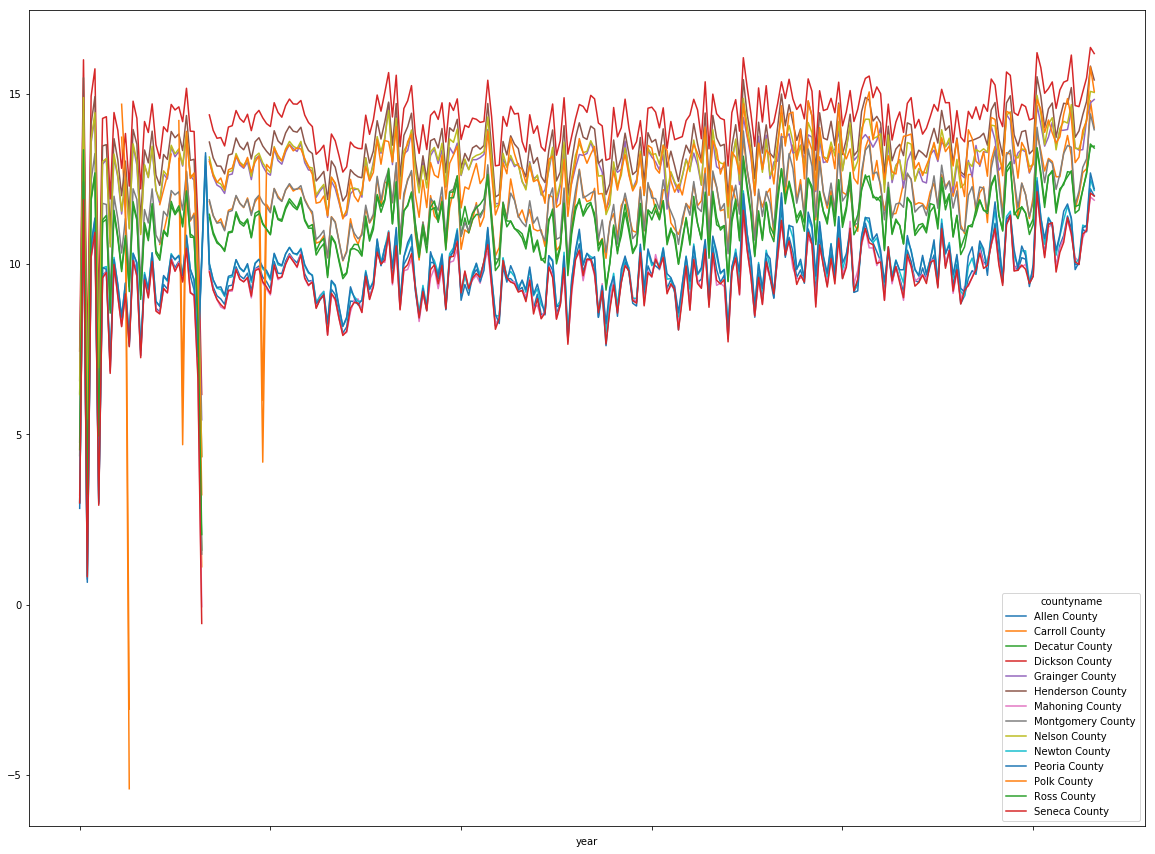

In [26]:
# average yearly temperature in different counties in the central region
fig, ax = plt.subplots(figsize=(20,15))
central_region.groupby(['year','countyname']).mean()['AverageTemperature'].unstack().plot(ax=ax)

In [27]:
region_temp_county = temp_county.copy()
region_temp_county[region] =  

SyntaxError: invalid syntax (<ipython-input-27-cb211b6c609c>, line 2)